## Exploratory Data Analysis Census Income Data Set 

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/census.csv")
df.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The datasets contains 32561 and 15 columns

In [3]:
print(df.shape)

(32561, 15)


Some processing to the name of the columns

In [4]:
df.columns

Index(['age', ' workclass', ' fnlgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

In [5]:
def column_processing(column):
    column = column.replace(" ", "")
    column = column.replace("-", "_")
    return column
    
new_columns = map(column_processing, df.columns)
new_columns = list(new_columns)
print(new_columns)

['age', 'workclass', 'fnlgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary']


In [6]:
df.columns = new_columns

Exploring the column data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgt           32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Checking for null values

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlgt             0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

Exploring unbalanced target variable

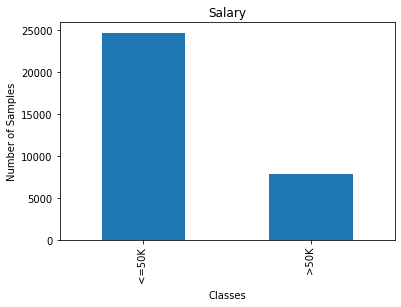

In [9]:
df.salary.value_counts().plot(kind="bar", title="Salary")
plt.xlabel("Classes")
plt.ylabel("Number of Samples");

Checking the distribution of predictors

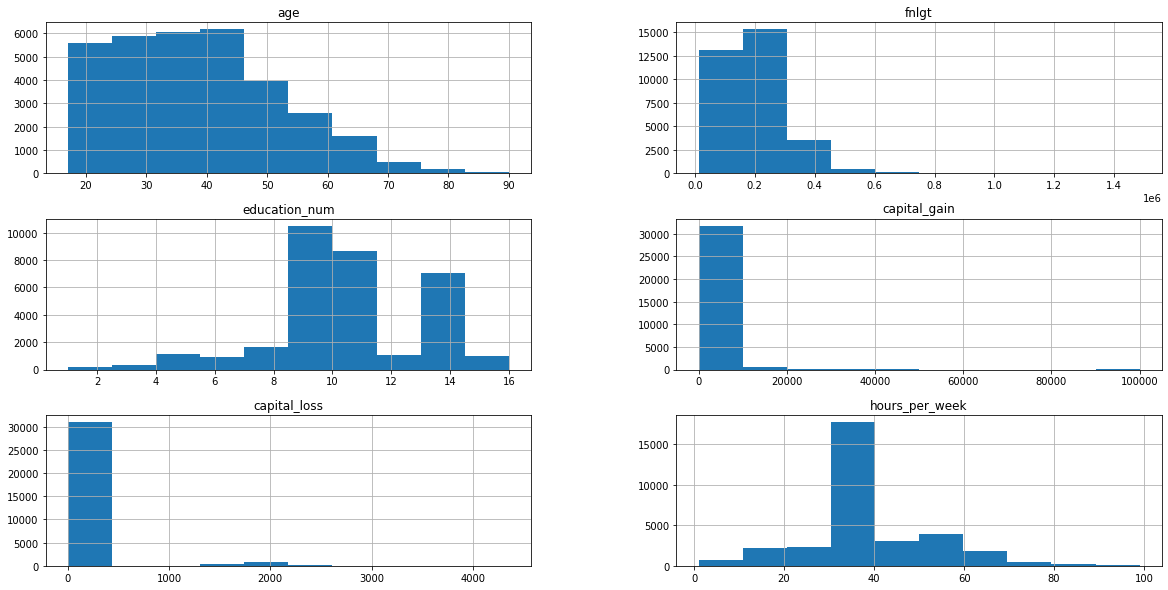

In [10]:
df.hist(figsize=(20, 10));

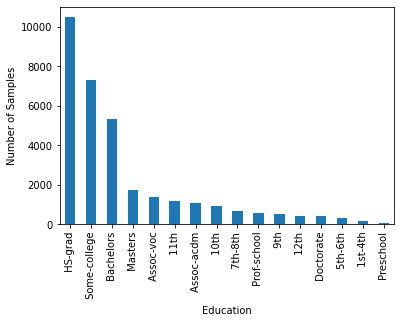

In [11]:
df.education.value_counts().plot(kind="bar")
plt.xlabel("Education")
plt.ylabel("Number of Samples");

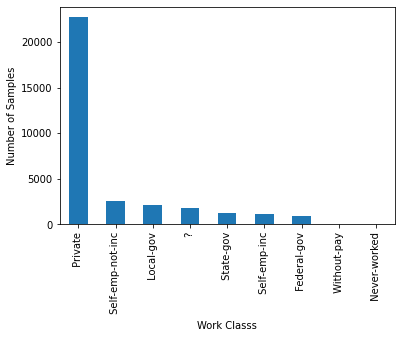

In [12]:
df.workclass.value_counts().plot(kind="bar")
plt.xlabel("Work Classs")
plt.ylabel("Number of Samples");

There are missing values in the workclass column with ' ?'

In [14]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Let's check how many of them:

In [15]:
mask = df.workclass == " ?"
print(len(df[mask]))

1836


We need to see the percentage of values in comparisson to the full length of the dataset

In [21]:
percentage = (1836 * 100) / 32561
print(percentage)

5.638647461687294


I decided to use replace this values with the most common workclass "Private", otherwise I would have to drop them

In [23]:
df[mask] = ' Private'

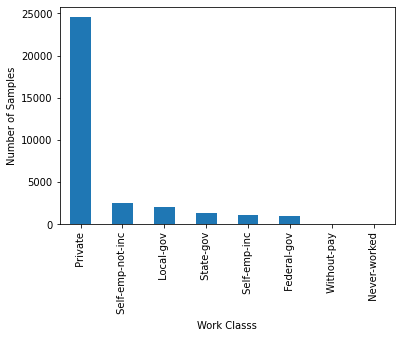

In [24]:
df.workclass.value_counts().plot(kind="bar")
plt.xlabel("Work Classs")
plt.ylabel("Number of Samples");

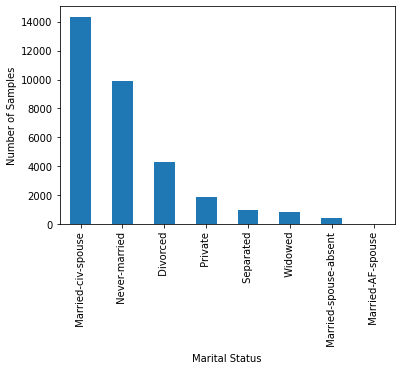

In [25]:
df.marital_status.value_counts().plot(kind="bar")
plt.xlabel("Marital Status")
plt.ylabel("Number of Samples");

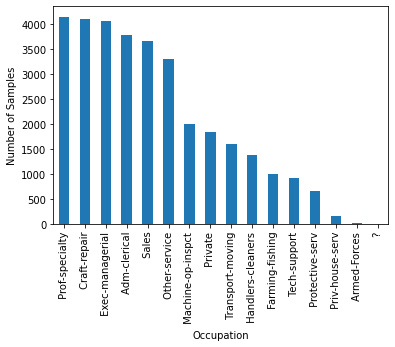

In [26]:
df.occupation.value_counts().plot(kind="bar")
plt.xlabel("Occupation")
plt.ylabel("Number of Samples");

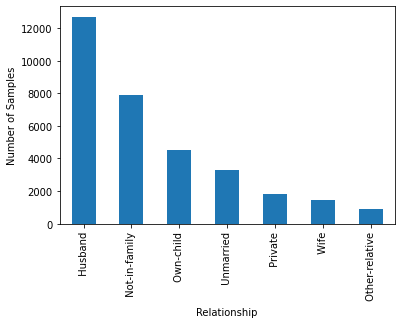

In [27]:
df.relationship.value_counts().plot(kind="bar")
plt.xlabel("Relationship")
plt.ylabel("Number of Samples");

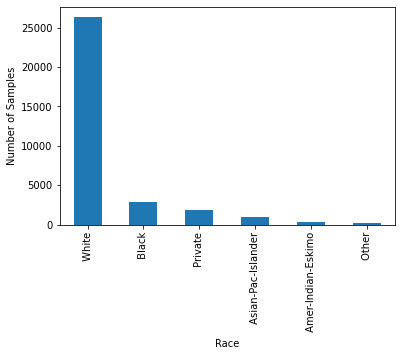

In [28]:
df.race.value_counts().plot(kind="bar")
plt.xlabel("Race")
plt.ylabel("Number of Samples");

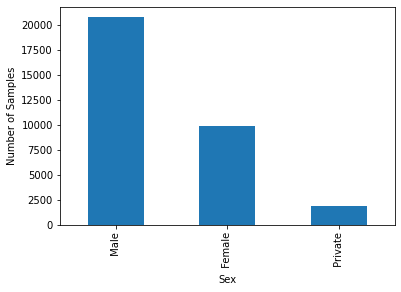

In [29]:
df.sex.value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Number of Samples");

In [30]:
df.native_country.value_counts()

 United-States                 27511
 Private                        1836
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Taiwan                           42
 Haiti                            42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 

Similar problem here, let's figure out the percentage of each value of the frequency in each country

In [33]:
number_rows = len(df)
df.native_country.value_counts() / number_rows * 100

 United-States                 84.490648
 Private                        5.638647
 Mexico                         1.873407
 ?                              1.707564
 Philippines                    0.577378
 Germany                        0.393108
 Puerto-Rico                    0.334756
 Canada                         0.328614
 El-Salvador                    0.307116
 India                          0.307116
 Cuba                           0.282547
 England                        0.264120
 Jamaica                        0.245693
 South                          0.218052
 China                          0.208839
 Italy                          0.208839
 Dominican-Republic             0.205768
 Vietnam                        0.196554
 Guatemala                      0.193483
 Japan                          0.181198
 Poland                         0.171985
 Columbia                       0.171985
 Taiwan                         0.128989
 Haiti                          0.128989
 Iran           

It's close to 2%, let's just replace those values with USA, the most frequent contry

In [35]:
df[df.native_country == ' ?'] = ' United-States'

In [36]:
df.native_country.value_counts()

 United-States                 28067
 Private                        1836
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Columbia                         56
 Poland                           56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

Saving the new cleaned dataset:

In [37]:
df.to_csv("../data/clean_data.csv", index=False)

In [38]:
new_df = pd.read_csv("../data/clean_data.csv")

In [39]:
new_df.head()

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
